---
---
# <div style="display: flex; justify-content: center">**Trustworty AI Homework**</div>
<div style="display: flex; justify-content: center">
    <span style="font-weight: bold; margin-right: 10px;">Topic:</span>
    <span>Esports analysis - Predicting round winning team in professional Counter Strike (thesis topic)</span>
</div>
<div style="display: flex; justify-content: center">
    <span style="font-weight: bold; margin-right: 10px;">Name:</span>
    <span>Patrik Peter Szmida</span>
</div>
<div style="display: flex; justify-content: center">
    <span style="font-weight: bold; margin-right: 10px;">Neptun:</span>
    <span style="margin-bottom: 15px;">G0HPLP</span>
</div>

---
---


# **II. Milestone: Model training and evaluation**

## II. I. Aim of milestone

In this milestone the main focus is on training both blackbox and whitebox models for the HLTV Counter Strike dataset. Evaluating the prediction results, while also trying to understand the reasoning behind it will also be important in this section.

## II. II. Changes in the data

Since this is my thesis project, I was continuously working on it throughout the semester, which involved extending the data that I already have with more informations that I can encapsulate in the graph. As a result of the updated preprocess flow, some of the original features form the previous milestone in the dataset were updated/renamed, plus new features were added. Some of these are new player-state describig boolean flags (for example whether a player is unknown, reloading, or has the bomb, etc.), others extend the palette of the players statistical descriptions: more detailed in-game statistics were added, as well as overall performance describing metrics. 

In the previous milestone, two datasets were analyzed: one was the graph datatset, the other was the player overall and Inferno map related statistical dataset. These two were analyzed separately due to a merge error that occured in the previous semester, leading to the corruption of the player overall statistical vaiables in the graphs. In this semester, this error was also fixed, resulting in a completed graph dataset with much wider variety of performance features. Another conclusion from th previous milestoine highlighted that using both the Inferno related and overall player metrics dataset would not be promising as these to have extremely high correlation; for this reason, I only included the overall metrics data in this semester's updated dataset. In this section the changes in the list of the features are listed.

### II. II. - 1. Updates in the feature set

In this section, the updates in the dataset are described, beginning with the description of the features: 
  - Renamed features will be shown with this convetion: ***old_name*** -> ***new_name***
  - New features are highlighted with <span style="font-style: italic; font-weight: bold; color: royalblue">blue</span> color
  - Deleted features are highlighted with <span style="font-style: italic; font-weight: bold; color: red">red</span> color
  - The overall statistical features added will not be included in this list since these were analyzed in the previous milestone as a separate dataset. This time it is included in the tabular graph representation dataset.

Player related features:

  - **x, y, z**: Coordinates of the player.
  - **hp**: Healt remaining. [100-0]
  - **armor**: Armor remaining. [100-0]
  - **flash_num** -> **flashGrenades**: Number of Flash Grenades of the player. [0-2]
  - **smoke_num** -> **smokeGrenades**: Number of Smoke Grenades of the player. [0-1]
  - **he_num** -> **heGrenades**: Number of High Explosive Grenades of the player. [0-1]
  - <span style="font-style: italic; font-weight: bold; color: royalblue">totalUtility</span>: A player's total number of grenades.
  - **isAlive**: Whether the player is alive in the actual secon of the round.
  
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isReloading</span>: Whether the player is reloading his weapon.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isBlinded</span>: Whether the player is blinded by a flash grenade.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isDucking</span>: Whether the player is crouching.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isDefusing</span>: Whether the player is defusing the bomb (only important for the defenders).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isPlanting</span>: Whether the player is planting the bomb (only important for the attackers).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isUnknown</span>: Whether the player's position is unknown to the enemy team.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">isScoped</span>: Whether the player is scoped (when using a long range sniper rifle).
  - **equipment_value**: How expensive are the weapons and utility at the player are.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">equipmentValueRoundStart</span>: How expensive are the weapons and utility at the player were when the round begun.
  - **has_helmet**: Whether the player has a helmet (it is an extension to the armor: more expensive but gives additional protection to players)
  - **has_defuse**: Whether the player has a *defuse_kit* (only the CTs can have it, it's a tool for speedig up the defusing of the bomb, if it was planted)
  - <span style="font-style: italic; font-weight: bold; color: royalblue">hasBomb</span>: Whether the player has the *bomb* (only relevant for attackers).
  - **kills** -> **stat_kills**: Number of successful eliminations done by the player in the examined *match*.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_HSK</span>: Number of headshot-kills.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_openKills</span>: Number of opening kills (first kill in the round).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_tradeKills</span>: Number of trade kills (a trade is when a player *A* gets eliminated by *X*, but then *A*'s teammate, *C*, eliminates *X* shortly after).
  - **deaths** -> **stat_deaths**: Number of deaths of the player in the examined *match*.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_openDeaths</span>: Number of opening deaths (when the player gets eliminated first from the round).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_assists</span>: Number of assists (when the player assists in a kill by causing damage to the opponent, but the finishing strike is struck by a teammate).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_flashAssists</span>: Number of times the player successfully blinded an opponent, resulting in a teammate killing that opponent.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_damage</span>: Total damage done by the player.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_weaponDamage</span>: Total damage done by the player by weapons.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">stat_nadeDamage</span>: Total damage done by the player by nades.

  - **activeWeapon_*[weapon_name]***: Boolean flags that indicate which weapon the player is currently holding in his hands (some examples for *weapon_name*: AK-47, AWP, Smoke_Grenade, etc.).
  - **is_ct**: Whether the player is playing on the defending side.

Overall features:

  - **roundNum**: Shows in which round the snapshot was taken in
  - <span style="font-style: italic; font-weight: bold; color: red">team1AliveNum</span>: Number of players alive in the first team.  (Replaced with CT_aliveNum*)
  - <span style="font-style: italic; font-weight: bold; color: red">team2AliveNum</span>: Number of players alive in the second team. (Replaced with T_aliveNum*)
  - <span style="font-style: italic; font-weight: bold; color: royalblue">CT_aliveNum</span>: Number of players alive on the CT side.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">T_aliveNum</span>: Number of players alive on the T side. 
  - **match_id**: Match ID
  - **t_score**: How many rounds the attackers (Ts) won so far in the match
  - **ct_score**: How many rounds the defenders (CTs) won so far in the match
  - **is_team1_ct**: Whether the first team is playing on the CT side currently
  - <span style="font-style: italic; font-weight: bold; color: red">team1_equipment_value</span>: Total equipment value of the first team. (Replaced with CT_equipmentValue*)
  - <span style="font-style: italic; font-weight: bold; color: red">team2_equipment_value</span>: Total equipment value of the second team. (Replaced with T_equipmentValue*)
  - <span style="font-style: italic; font-weight: bold; color: royalblue">CT_equipmentValue</span>: Total value of equipment on the CT side.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">T_equipmentValue</span>: Total value of equipment on the T side.
  - <span style="font-style: italic; font-weight: bold; color: red">team1_total_grenade_num</span>: Number of grenades of the first team. (Removed)
  - <span style="font-style: italic; font-weight: bold; color: red">team2_total_grenade_num</span>: Number of grenades of the second team. (Removed)
  
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_being_planted,</span>: Boolean flag, whether the bomb is being planted at the moment.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_being_defused,</span>: Boolean flag, whether the bomb is being defused at the moment.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_defused,</span>: Boolean flag, whether the bomb is defused.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_planted_at_A_site,</span>: Boolean flag, whether the bomb is planted at A site.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">is_bomb_planted_at_B_site,</span>: Boolean flag, whether the bomb is planted at B site.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_X,</span>: Bomb X coorinate.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_Y,</span>: Bomb Y coorinate.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_Z,</span>: Bomb Z coorinate.
  - <span style="font-style: italic; font-weight: bold; color: red">seconds,</span>: Seconds, replaced with remaining time.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">time_remaining,</span>: Remaining time from the round.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">numerical_match_id,</span>: Four character long numerical match id.
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos1,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos2,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos3,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos4,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos5,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos6,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos7,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos8,</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).
  - <span style="font-style: italic; font-weight: bold; color: royalblue">bomb_mx_pos9</span>: Both bombsites were devided into 9 smaller fractions (3x3 matrix). This indicates which area the bomb is planted in (if planted).

  - **CTwinsRound** -> **CT_winsRound**: *Output variable*, shows whether the defenders win the round in the end.


*: These changes were necessary, since the output variable is ***CT_winsRound***, however, team1 can both be CT and T, depending on which half it is. For this reason I changed the meaning of these variables to this (These variables were analyzed in the previous milestone, I calculated them manually there as well, this time I just highlighted this change in the dataset)

The bombsite 3x3 matrices can be seen on the plot below (highlighted with black and white squares), plotted to the base graph of inferno.

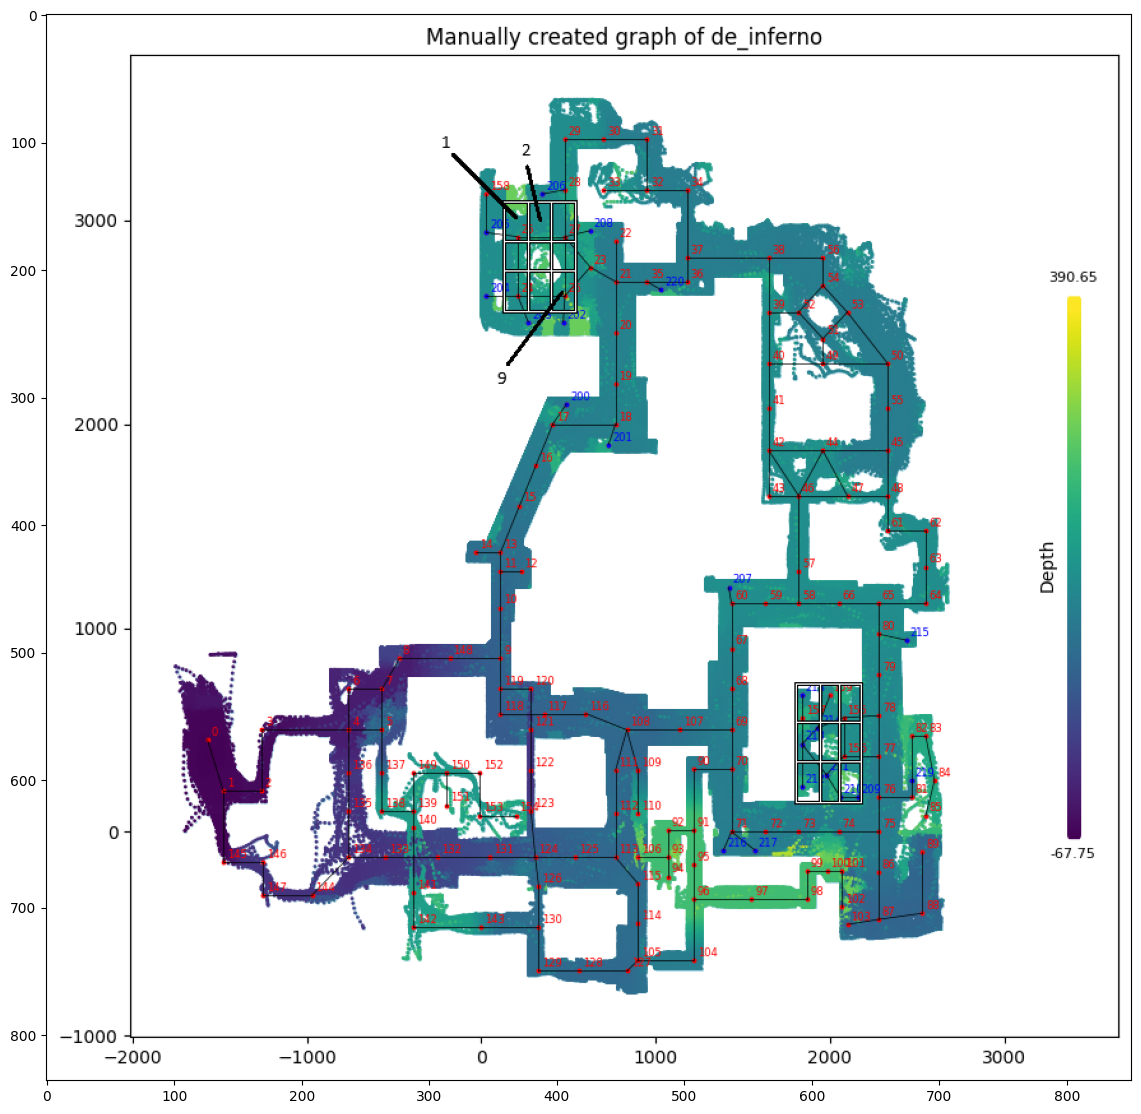

In [ ]:
fig = plt.figure(figsize=(14,14))
img = mpimg.imread('../data/inferno_graph/img/manual_v1_4_bombSite.png')
imgplot = plt.imshow(img)
plt.show()

### II. II. - 2. Dataset updates

The format of the dataset was updated as well. In a Drive link I provide the new tabular graph dataset (only part of it due to its size - after this semester's work I have ~ 700.000 graphs in these tabular datasets (overall 28 data files) with one csv containing around 25-30k rows, each of which represents one game moment graph). These datasets were also normalized during this semester, and the results are stored in separate files, also included in the Drive link. These normalized datasets were then used to create the heterogeneous graph dataset.


## 
#### *Imports*


In [6]:
from torch_geometric.data import HeteroData, DataLoader, Dataset
import torch

from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from pygam import LogisticGAM, s

import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import jupyter

from math import ceil, floor
import os

pd.set_option('display.max_columns', 150)

# ----------------Torch dataset class----------------

class InfernoDataset(Dataset):
    def __init__(self, data_list):
        super(InfernoDataset, self).__init__()
        self.data_list = data_list

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

## II. III. Whitebox models

In this sections, several whitebox models are trained on the normalized tabular dataset in order to predict whether the CTs will win the round based on the given game state or not. The tabular dataset is used in this part since (as far as I know) there aren't any "ordinary" whitebox models that are capable of training on graph structured data.

***Fundamental details***: Before the training of the whitebox models, in this section I describe my thesis task in greater detail than before, in order to explain the selected whitebox models for the predictions. My thesis objective is to examine game snapshots (in graph format) from professional Counter Strike matches and predict the round winning team in the actual round (CT - defender, or T - attacker side) based on the game state using graph neural networks. An important detail to highlight here is that although pushing the gnn to the best predictive performance is the primary focus in my thesis, the real task is not to predict the winner side, but rather the probabilities for each side. If I store the winning probabilities of a snapshot in a ranodm variable $X$, it can be seen that $X$ follows a *Bernoulli* distribution: 
$$
X \sim \text{Bernoulli}(p),
$$
where $p$ is the probability of the CT side winning the round, while $(1 - p)$ is the chance for the T side for success.

The reason for this is the desire for player action evaluation, an idea inspired from an article titled <a href="https://arxiv.org/pdf/2011.01324">Valuing Player Actions in Counter-Strike: Global Offensive</a>. In this work the authors used an XGBoost model on game snapshots represented in a tabular format to predict the round winning probability. Doing this prediction for whole rounds, and than visualizing the results (like for example in Fig. 4 of the article) reveals that the probability of winning fluctuates over time, depending on the actions of the players. Drawing inspiration form this idea, the aim of this thesis is to create an accurate GNN which can be used to predict winning probability throughout whole rounds (using the snapshots), and then examine fluctuations in the probabilities. An increase in a team's winning chance can be a result of a great action of a player from that team or a poor move from the opposing team; in the second part of the thesis I focus on reverse-engineering the fluctuations so that they can evaluate player actions.

> **Note**: The current GNN approach lacks an important factor, which is considering the time-series like nature of the data. This is an issue that I will address in my second semester of the thesis work (I was not able to get there this semester unfortunately) by extending the gnn structure to be able to account for this; essentially, the plan is to use heterogeneous temporal graph network for the final predictions.

For the reasons mentioned above, I only test whitebox models in this part that are capable of predicting probabilities instead of labels, as this is the main objective of my task.

### 1. Logistic Regression

#### Import and format data

Import the normalized tabular datasets and delete not needed columns (such as player names, match_id, etc).

In [ ]:
df_og = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_1.csv')

for i in range(2, 5):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    df_og = pd.concat([df_og, temp])

In [ ]:
df = df_og.copy()

df = df.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                      'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                      'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

# Save feature order
feature_order = df.columns

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=['CT_winsRound']).fillna(0)
y = df['CT_winsRound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#### Training Logistic Regression

Train the Logistic Regression model and check feature coefficients.

Training loss: 0.306581
Accuracy: 0.770236
Precision: 0.750276
Recall: 0.773541
F1: 0.761731
ROC AUC: 0.859839


C:\Users\szmid\AppData\Local\Temp\ipykernel_20460\2709059147.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


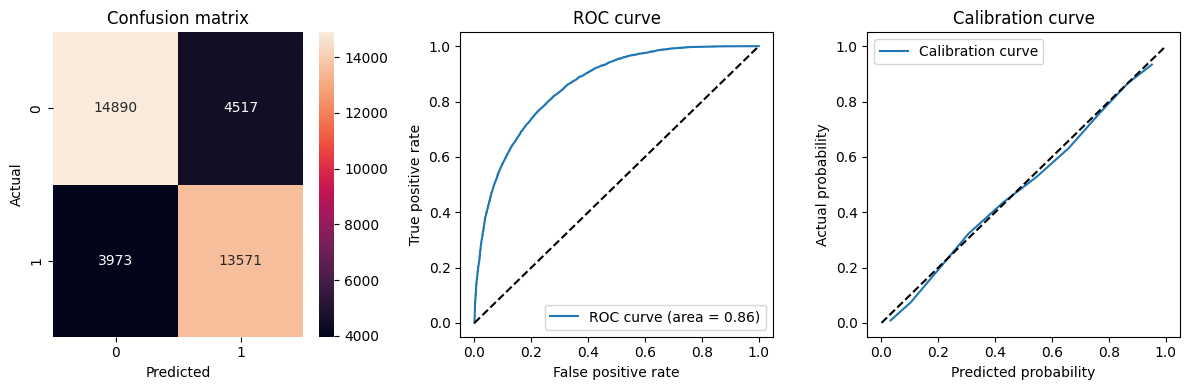

In [18]:
model = LogisticRegression(random_state=42, n_jobs=8)
model.fit(X_train, y_train)

# Predict probability estimates for ROC AUC and ROC curve
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, np.round(y_proba))
precision = precision_score(y_test, np.round(y_proba))
recall = recall_score(y_test, np.round(y_proba))
f1 = f1_score(y_test, np.round(y_proba))
conf_matrix = confusion_matrix(y_test, np.round(y_proba))
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
loss = np.mean(np.abs(y_test - y_proba))

# Print metrics
print("Training loss: {:.6f}".format(loss))
print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1: {:.6f}".format(f1))
print("ROC AUC: {:.6f}".format(roc_auc))

# Plot confusion matrix and ROC curve
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC curve
axs[1].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend()

# Model calibration
calibration = pd.DataFrame({'predicted': y_proba, 'actual': y_test})
calibration['bucket'] = pd.qcut(calibration['predicted'], 10)
calibration = calibration.groupby('bucket').mean().reset_index()

axs[2].plot(calibration['predicted'], calibration['actual'], label='Calibration curve')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title("Calibration curve")
axs[2].set_xlabel("Predicted probability")
axs[2].set_ylabel("Actual probability")
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1).head(50)

,Feature_pos,Importance_pos,Feature_neg,Importance_neg
0,CT_equipmentValue,[1.5305497981286154],T_equipmentValue,[-1.5520967922191033]
1,player6_hasDefuse,[0.6903233404107936],is_bomb_planted_at_A_site,[-1.0340469916860748]
2,player1_hasDefuse,[0.6752361259689575],is_bomb_planted_at_B_site,[-0.7352370554561556]
3,player0_hasDefuse,[0.5272344468439897],bomb_Y,[-0.6681081384587132]
4,player7_hasDefuse,[0.5078616586476196],bomb_mx_pos2,[-0.6238178791241995]
5,player6_activeWeapon_M4A1,[0.5034311473633357],bomb_Z,[-0.6083126137601753]
6,player4_activeWeapon_M4A1,[0.50025227846244],player9_activeWeapon_AK-47,[-0.5698891871226869]
7,player8_activeWeapon_M4A1,[0.46751468387362416],bomb_X,[-0.5667746243415912]
8,player9_activeWeapon_M4A1,[0.4357482702337164],bomb_mx_pos3,[-0.4923878813727228]
9,player3_overall_rating_1.0_all_Career,[0.3804099299053304],player8_activeWeapon_AK-47,[-0.45636548669591426]


In [ ]:
positive.loc[positive['Feature_pos'].str.contains('_y')]

,Feature_pos,Importance_pos
541,player5_y,[0.10755379332527401]
433,player4_y,[0.050394582281038866]
325,player3_y,[-0.006260130861826533]
109,player1_y,[-0.025091143784181678]
1,player0_y,[-0.025617980976590456]
865,player8_y,[-0.04639609561494485]
649,player6_y,[-0.07205707098954475]
217,player2_y,[-0.09551136402957205]
757,player7_y,[-0.10293958225768102]
973,player9_y,[-0.31843978729272315]


#### Test model

In [ ]:
test = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_21.csv')

for i in range(22, 26):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    test = pd.concat([test, temp])

test = test.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                          'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                          'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

Test loss: 0.37
Accuracy: 0.70
Precision: 0.64
Recall: 0.72
F1: 0.68
ROC AUC: 0.70


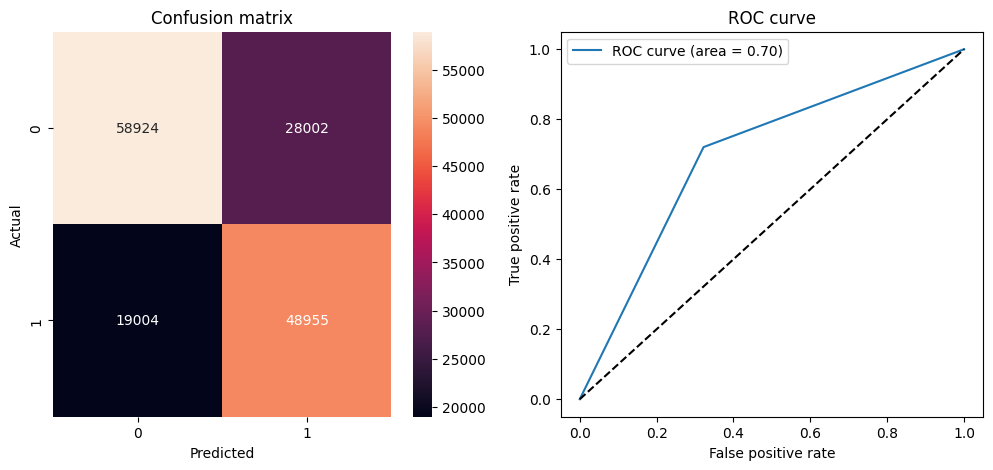

In [ ]:
test_X = test.drop(columns=['CT_winsRound']).fillna(0)
test_y = test['CT_winsRound']

test_y_pred = model.predict_proba(test_X)[:, 1]

test_accuracy = accuracy_score(test_y, np.round(test_y_pred))
test_precision = precision_score(test_y, np.round(test_y_pred))
test_recall = recall_score(test_y, np.round(test_y_pred))
test_f1 = f1_score(test_y, np.round(test_y_pred))
test_conf_matrix = confusion_matrix(test_y, np.round(test_y_pred))
test_roc_auc = roc_auc_score(test_y, np.round(test_y_pred))
test_fpr, test_tpr, _ = roc_curve(test_y, np.round(test_y_pred))
test_roc_auc = auc(test_fpr, test_tpr)
test_loss = np.mean(np.abs(test_y - test_y_pred))

print("Test loss: {:.2f}".format(test_loss))
print("Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(test_precision))
print("Recall: {:.2f}".format(test_recall))
print("F1: {:.2f}".format(test_f1))
print("ROC AUC: {:.2f}".format(test_roc_auc))

fig, axs = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[1].plot(test_fpr, test_tpr, label='ROC curve (area = {:.2f})'.format(test_roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend();



### Logistic GAM

#### Import and format data

Import the normalized tabular datasets and delete not needed columns (such as player names, match_id, etc).

In [5]:
df_og = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_1.csv')

for i in range(2, 5):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    df_og = pd.concat([df_og, temp])

In [7]:
df = df_og.copy()

df = df.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                      'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                      'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

# Save feature order
feature_order = df.columns

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.drop(columns=['CT_winsRound']).fillna(0)
y = df['CT_winsRound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#### Logistic GAM

Train the Logistic Regression model and check feature coefficients.

Training loss: 0.3833
Accuracy: 0.7146
Precision: 0.7184
Recall: 0.6559
F1: 0.6857
ROC AUC: 0.7887


C:\Users\szmid\AppData\Local\Temp\ipykernel_20460\1059804717.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = calibration.groupby('bucket').mean().reset_index()


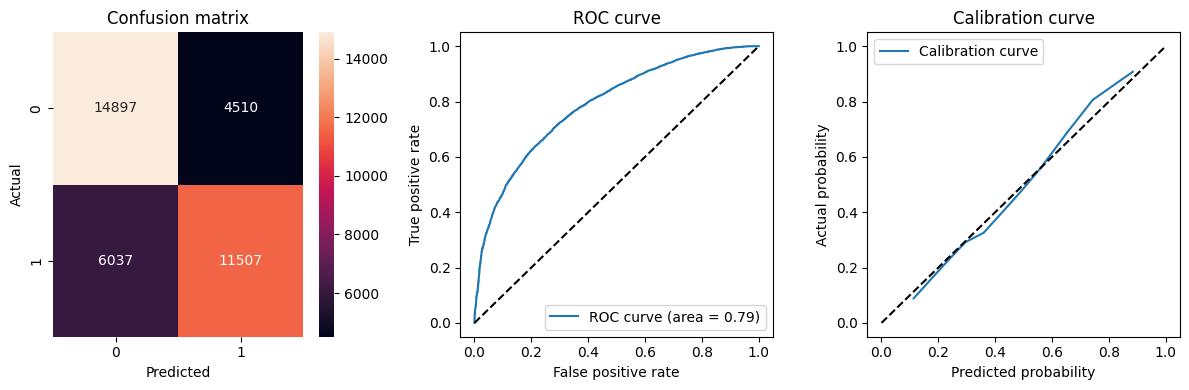

In [20]:
model = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + \
                    s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + \
                    s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29))
model.fit(X_train, y_train)

# Predict probability estimates for ROC AUC and ROC curve
y_proba = model.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, np.round(y_proba))
precision = precision_score(y_test, np.round(y_proba))
recall = recall_score(y_test, np.round(y_proba))
f1 = f1_score(y_test, np.round(y_proba))
conf_matrix = confusion_matrix(y_test, np.round(y_proba))
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
loss = np.mean(np.abs(y_test - y_proba))

# Print metrics
print("Training loss: {:.4f}".format(loss))
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))
print("ROC AUC: {:.4f}".format(roc_auc))

# Plot confusion matrix and ROC curve
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC curve
axs[1].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend()

# Model calibration
calibration = pd.DataFrame({'predicted': y_proba, 'actual': y_test})
calibration['bucket'] = pd.qcut(calibration['predicted'], 10)
calibration = calibration.groupby('bucket').mean().reset_index()

axs[2].plot(calibration['predicted'], calibration['actual'], label='Calibration curve')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title("Calibration curve")
axs[2].set_xlabel("Predicted probability")
axs[2].set_ylabel("Actual probability")
axs[2].legend()

plt.tight_layout()
plt.show()

In [11]:
positive = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_pos', 'Importance_pos']).T.sort_values(by='Importance_pos', ascending=False)
negative = pd.DataFrame([X.columns, model.coef_.T], index=['Feature_neg', 'Importance_neg']).T.sort_values(by='Importance_neg', ascending=True)
pd.concat([positive.reset_index(drop=True), negative.reset_index(drop=True)], axis=1).head(50)

,Feature_pos,Importance_pos,Feature_neg,Importance_neg
0,player1_activeWeapon_AWP,13.749553,player4_activeWeapon_M4A4,-10.676429
1,player4_activeWeapon_Glock-18,7.100619,player4_activeWeapon_Tec-9,-7.290115
2,player4_activeWeapon_Dual Berettas,6.360837,player1_overall_saved_teammatesPR,-5.907288
3,player5_activeWeapon_XM1014,5.788926,player0_isDefusing,-5.474377
4,player4_stat_kills,5.294299,player1_overall_saved_by_teammatePR,-5.351105
5,player1_activeWeapon_G3SG1,4.637841,player1_overall_opening_kill_rating,-5.117998
6,player4_activeWeapon_MP7,4.199528,player0_x,-3.906651
7,player1_overall_clutches_won_1on2,3.806679,player1_overall_maps_played,-3.784243
8,player5_stat_flashAssists,3.786465,player1_activeWeapon_SCAR-20,-3.760903
9,player4_activeWeapon_MP9,3.719666,player4_activeWeapon_UMP-45,-3.576296


In [13]:
positive.loc[positive['Feature_pos'].str.contains('equipment')]

,Feature_pos,Importance_pos
456,player4_equipmentValueRoundStart,0.085625
455,player4_equipmentValue,0.063522
347,player3_equipmentValue,-0.03684
348,player3_equipmentValueRoundStart,-0.045323
131,player1_equipmentValue,-0.063337
240,player2_equipmentValueRoundStart,-0.103834
132,player1_equipmentValueRoundStart,-0.231823
239,player2_equipmentValue,-0.467086
24,player0_equipmentValueRoundStart,-0.496257
23,player0_equipmentValue,-0.51635


#### Test model

In [14]:
test = pd.read_csv('../data/graph-dataset/semester-2/norm-form-tabular/norm_df_21.csv')

for i in range(22, 26):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/norm-form-tabular/norm_df_{i}.csv')
    test = pd.concat([test, temp])

test = test.drop(columns=['player0_name', 'player1_name', 'player2_name', 'player3_name', 'player4_name',
                          'player5_name', 'player6_name', 'player7_name', 'player8_name', 'player9_name',
                          'match_id', 'numerical_match_id', 'roundNum', 'endTScore', 'endCTScore', 'tick'])

Test loss: 0.48
Accuracy: 0.55
Precision: 0.49
Recall: 0.55
F1: 0.52
ROC AUC: 0.55


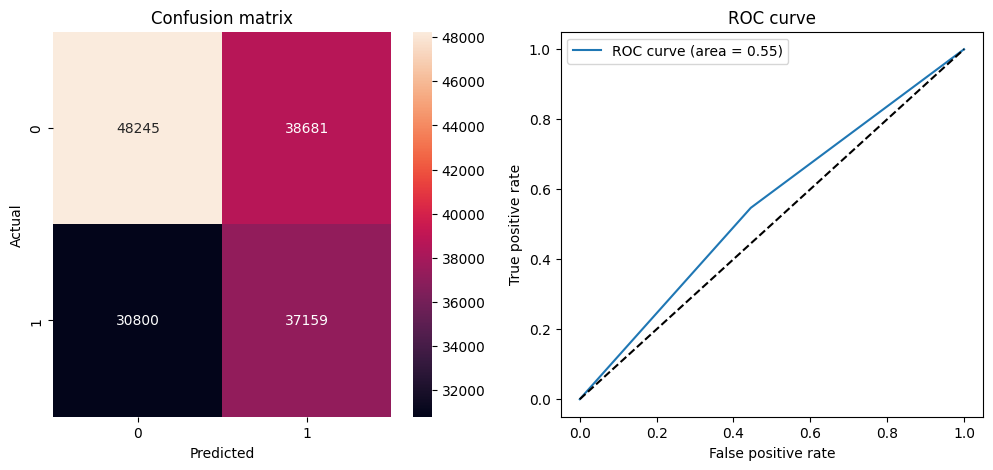

In [16]:
test_X = test.drop(columns=['CT_winsRound']).fillna(0)
test_y = test['CT_winsRound']

test_y_pred = model.predict_proba(test_X)

test_accuracy = accuracy_score(test_y, np.round(test_y_pred))
test_precision = precision_score(test_y, np.round(test_y_pred))
test_recall = recall_score(test_y, np.round(test_y_pred))
test_f1 = f1_score(test_y, np.round(test_y_pred))
test_conf_matrix = confusion_matrix(test_y, np.round(test_y_pred))
test_roc_auc = roc_auc_score(test_y, np.round(test_y_pred))
test_fpr, test_tpr, _ = roc_curve(test_y, np.round(test_y_pred))
test_roc_auc = auc(test_fpr, test_tpr)
test_loss = np.mean(np.abs(test_y - test_y_pred))

print("Test loss: {:.2f}".format(test_loss))
print("Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(test_precision))
print("Recall: {:.2f}".format(test_recall))
print("F1: {:.2f}".format(test_f1))
print("ROC AUC: {:.2f}".format(test_roc_auc))

fig, axs = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', ax=axs[0])
axs[0].set_title("Confusion matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[1].plot(test_fpr, test_tpr, label='ROC curve (area = {:.2f})'.format(test_roc_auc))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_title("ROC curve")
axs[1].set_xlabel("False positive rate")
axs[1].set_ylabel("True positive rate")
axs[1].legend();

